In [73]:
import pandas as pd
import numpy as np
from IPython.display import Image
import re
import matplotlib.pyplot as plt

In [94]:
import sklearn.datasets as datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

In [44]:
import pydotplus
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz

import warnings
warnings.filterwarnings("ignore")

In [45]:
# load digits dataset

digits = datasets.load_digits()
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [46]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [47]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [48]:
print("label : ", digits.target[0])
digits.images[0]

label :  0


array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [49]:
def remove_gini_impurity(graph_val):
    """helper function"""
    return re.sub(r'gini = (.*)<br/>s', "s", graph_val)

In [59]:
def draw_tree(dtree):
    """
    generate a pydotplus graph
    returns a png object that can be used in IPython.display.Image 
    """
    dot_data = StringIO()
    export_graphviz(dtree, out_file=dot_data, filled=True, rounded=True, special_characters=True)
    graph_val = remove_gini_impurity(dot_data.getvalue())
    graph = pydotplus.graph_from_dot_data(graph_val)
    return graph.create_png()

### Depth = 1

In [56]:
d_tree = DecisionTreeClassifier(max_depth=1)
d_tree.fit(digits.data, digits.target)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [58]:
d_tree.predict(digits.data)

array([0, 1, 1, ..., 1, 1, 1])

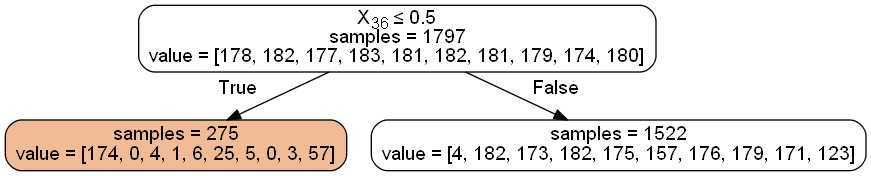

In [57]:
Image(draw_tree(d_tree))

### Depth = 2

In [63]:
d_tree = DecisionTreeClassifier(max_depth=2)
d_tree.fit(digits.data, digits.target)
d_tree.predict(digits.data)

array([0, 7, 7, ..., 7, 7, 7])

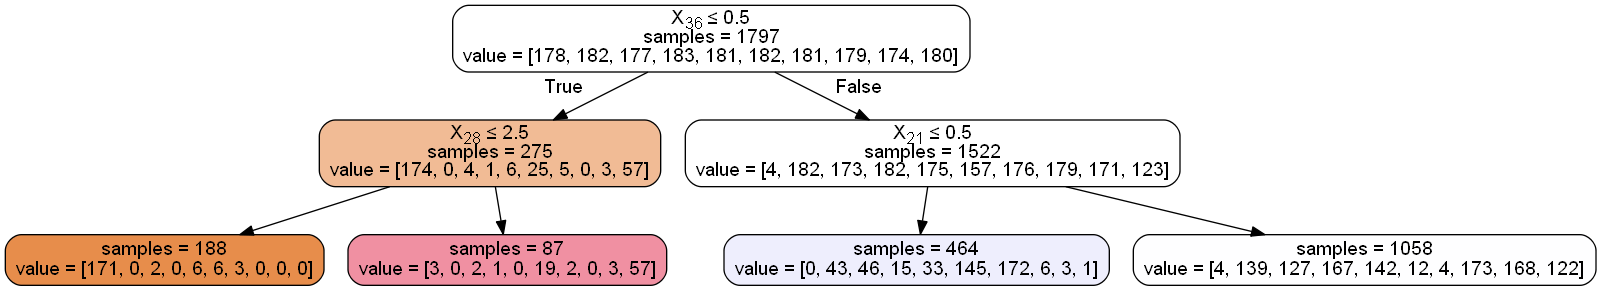

In [64]:
Image(draw_tree(d_tree))

### Depth = 3

In [65]:
d_tree = DecisionTreeClassifier(max_depth=3)
d_tree.fit(digits.data, digits.target)
d_tree.predict(digits.data)

array([0, 3, 3, ..., 3, 3, 3])

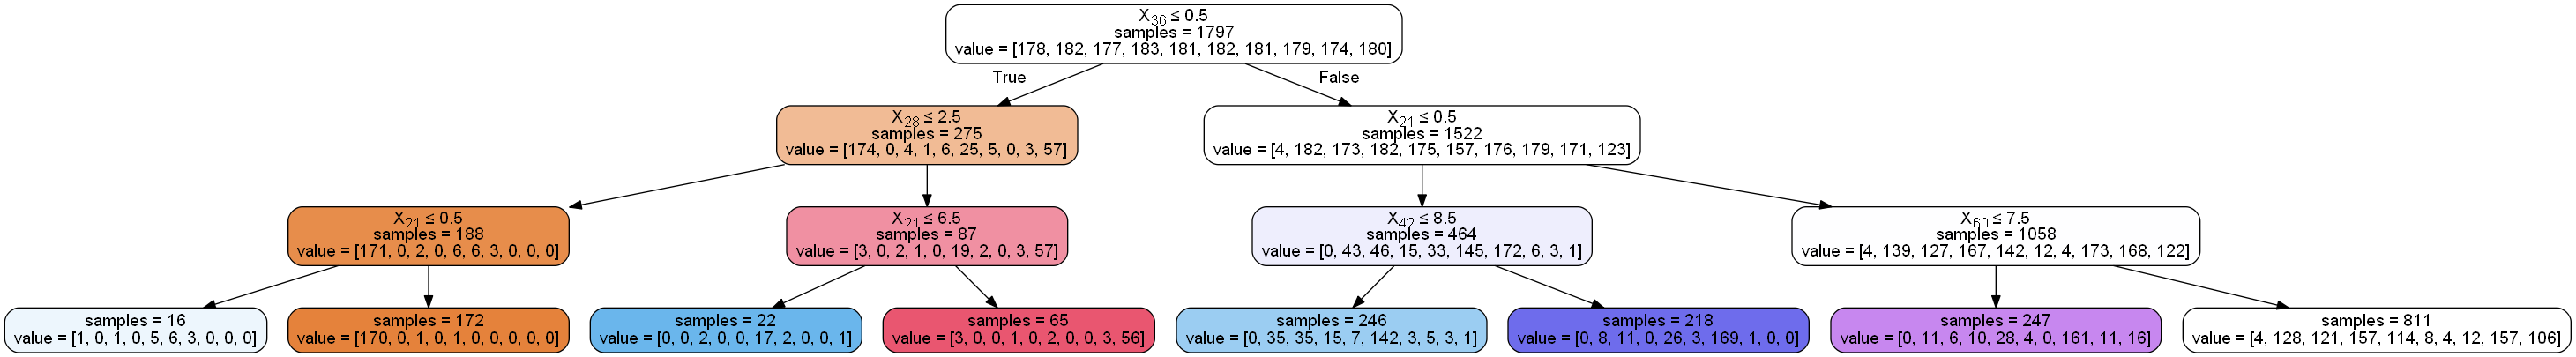

In [66]:
Image(draw_tree(d_tree))

### Training & Error

In [78]:
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.5, random_state=42)

In [82]:
def error_func(d_tree, x, y):
    y_pred = d_tree.predict(x)
    err = np.sum(y_pred != y) + 0.0
    return (err / len(x))

In [85]:
train_err, test_err, node_count = [], [], []
for depth in range(1, 30):
    d_tree = DecisionTreeClassifier(max_depth=depth)
    d_tree.fit(x_train, y_train)
    train_err.append(error_func(d_tree, x_train, y_train))
    test_err.append(error_func(d_tree, x_test, y_test))
    node_count.append(d_tree.tree_.node_count)

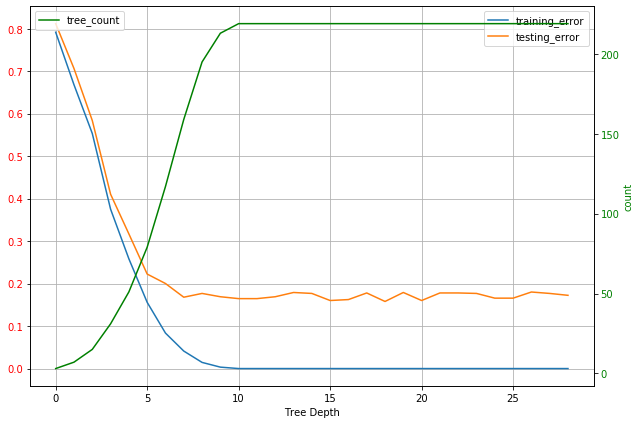

In [86]:
fig, ax1 = plt.subplots(figsize=[9, 6])

ax1.plot(train_err, label="training_error")
ax1.plot(test_err, label="testing_error")
ax1.set_xlabel("Tree Depth")
ax1.tick_params(axis="y", labelcolor="red")
ax1.legend()
ax1.grid()

ax2 = ax1.twinx()
ax2.plot(node_count, "g", label="tree_count")
ax2.set_ylabel("count", color="green")
ax2.tick_params(axis="y", labelcolor="green")
ax2.legend()

fig.tight_layout()
plt.show()

### Cross Validation

In [90]:
score_list = []
for depth in range(1, 30):
    d_tree = DecisionTreeClassifier(max_depth=depth)
    score = cross_val_score(d_tree, digits.data, digits.target, cv=10)
    score_list.append(np.mean(score))

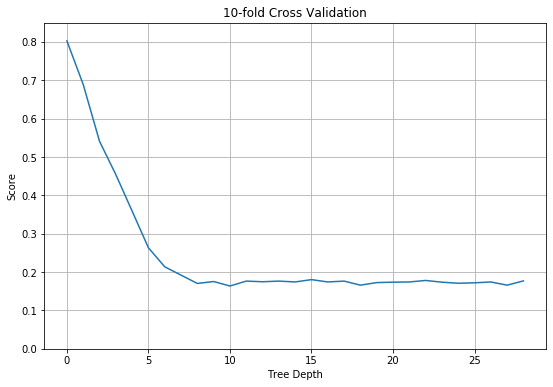

In [93]:
plt.figure(figsize=[9, 6])
plt.plot(1. - np.array(score_list))
plt.xlabel("Tree Depth")
plt.ylabel("Score")
plt.title("10-fold Cross Validation")
plt.ylim([0, 0.85])
plt.grid()
plt.show()

### Confusion Matrix

In [104]:
d_tree = DecisionTreeClassifier(max_depth=8)
d_tree.fit(x_train, y_train)
y_pred = d_tree.predict(x_test)

matrix = confusion_matrix(y_test, y_pred)

print("  {}".format("".join(["%3d"%num for num in range(10)])))
for val in range(matrix.shape[0]):
    print("%d"%val, matrix[val, :])

    0  1  2  3  4  5  6  7  8  9
0 [76  1  0  0  2  2  1  0  0  0]
1 [ 0 68  5  1  4  7  2  0  1  1]
2 [ 0  3 74  1  0  0  0  0  5  0]
3 [ 0  3  6 70  2  3  0  1  4  4]
4 [ 0  4  1  0 82  2  1  1  2  0]
5 [ 0  6  0  2  3 78  2  1  4  3]
6 [ 1  3  0  0  0  3 86  1  4  0]
7 [ 0  1  0  0  1  2  1 80  0  2]
8 [ 0 10  2  6  1  4  3  3 54  0]
9 [ 1  1  1  2  6  5  0  1  2 73]


### Summary

* Decision Tree greedily improves the purity of the function.
* Decision Tree over-fits if their depth is too large.
* Cross validation is more accurate.
* Confusion matrix identifies label pairs that re often confused with each other.